<a href="https://colab.research.google.com/github/BloodyLord123/Neural-network/blob/main/lab3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

['dog', 'cat']
[[[ 95  96  94]
  [ 95  96  94]
  [ 95  96  92]
  ...
  [ 28  45  58]
  [ 30  47  60]
  [ 32  49  62]]

 [[ 96  97  95]
  [ 96  97  95]
  [ 96  97  93]
  ...
  [ 27  44  57]
  [ 30  47  60]
  [ 31  48  61]]

 [[ 97  98  96]
  [ 97  98  96]
  [ 96  97  93]
  ...
  [ 27  44  57]
  [ 29  46  59]
  [ 30  47  60]]

 ...

 [[  0   9   0]
  [  0   9   0]
  [  0   9   0]
  ...
  [143 137 138]
  [143 137 138]
  [143 137 138]]

 [[  1  10   0]
  [  1  10   0]
  [  1  10   0]
  ...
  [142 137 138]
  [142 137 138]
  [142 137 138]]

 [[  1  10   0]
  [  1  10   0]
  [  1  10   0]
  ...
  [142 137 138]
  [142 137 138]
  [142 137 138]]]
(2000, 3000, 3)


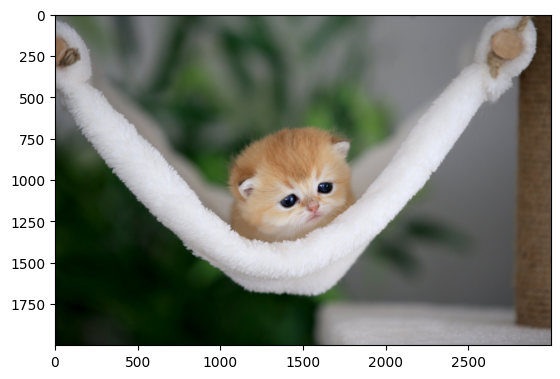

In [46]:
import numpy as np
np.set_printoptions(linewidth=np.inf)
import cv2
import imghdr
from matplotlib import pyplot as plt
data_location = './drive/MyDrive/new/'
import os
print(os.listdir(data_location))
img = cv2.imread(os.path.join (data_location, 'cat/205719.jpg'))
print(img)
print(img.shape)
plt.imshow(img)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

Cleaning

In [47]:
image_extensions=['jpeg','jpg','bmp','png']
for image_class in os.listdir(data_location):
    for image in os.listdir(os.path.join(data_location, image_class)):
        image_path = os.path.join(data_location, image_class, image)
        try:
            image_extention = imghdr.what(image_path)
            if image_extention not in image_extensions:
                print(f'Image not in ext list {image_path}')
                os.remove(image_path)
        except Exception as e:
            print(f'Issue with image {image_path}')

Convert files to dataset

In [48]:
import numpy as np
from matplotlib import pyplot as plt
import tensorflow as tf
data_location = './drive/MyDrive/new/'
data =tf.keras.utils.image_dataset_from_directory(data_location)

Found 212 files belonging to 2 classes.


data normalization

In [54]:
data_iterator = data.as_numpy_iterator()
batch = next(data_iterator)
tuple_data_index = 0
tuple_label_index = 1
scaled = batch[tuple_data_index] / 255
print(f'Scaled min {scaled.min()}')
print(f'Scaled max {scaled.max()}')

Scaled min 0.0
Scaled max 1.0


Split data

In [62]:
train_size=round(len(data)*.7)
val_size=round(len(data)*.2)
test_size=round(len(data)*.1)
print(f'train_size {train_size}')
print(f'val_size {val_size}')
print(f'test_size {test_size}')

train_size 5
val_size 1
test_size 1


In [61]:
train=data.take(train_size)
val=data.skip(train_size).take(val_size)
test=data.skip(train_size+val_size).take(test_size)
print(len(train))
print(len(val))
print(len(test))

5
1
1


CNN

In [64]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

model = Sequential()
model.add(Conv2D(16, (3, 3), 1, activation='relu', input_shape=(256, 256, 3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3, 3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3, 3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [65]:
log_location='./drive/MyDrive/new/logs/loglab3'
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_location)
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 25s 4s/step - accuracy: 0.5309 - loss: 134.4320 - val_accuracy: 0.4375 - val_loss: 14.1942
Epoch 2/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 19s 4s/step - accuracy: 0.6068 - loss: 7.0248 - val_accuracy: 0.5938 - val_loss: 1.8601
Epoch 3/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 19s 4s/step - accuracy: 0.5461 - loss: 1.4233 - val_accuracy: 0.5000 - val_loss: 0.7517
Epoch 4/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 21s 4s/step - accuracy: 0.5418 - loss: 0.6487 - val_accuracy: 0.6562 - val_loss: 0.6234
Epoch 5/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 19s 4s/step - accuracy: 0.7044 - loss: 0.5858 - val_accuracy: 0.8750 - val_loss: 0.5363
Epoch 6/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 19s 4s/step - accuracy: 0.8424 - loss: 0.5213 - val_accuracy: 0.8125 - val_loss: 0.4910
Epoch 7/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 21s 4s/step - accuracy: 0.8793 - loss: 0.4011 - val_accuracy: 0.9062 - val_loss: 0.2287
Epoch 8/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 19s 4s/step - accuracy: 0.8707 - loss: 0.2597 - val_accuracy: 1.0000 - val_loss: 0.0858
Epoch

Відображення результатів тестування

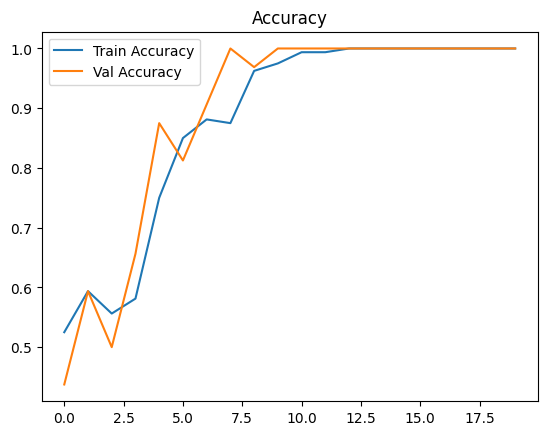

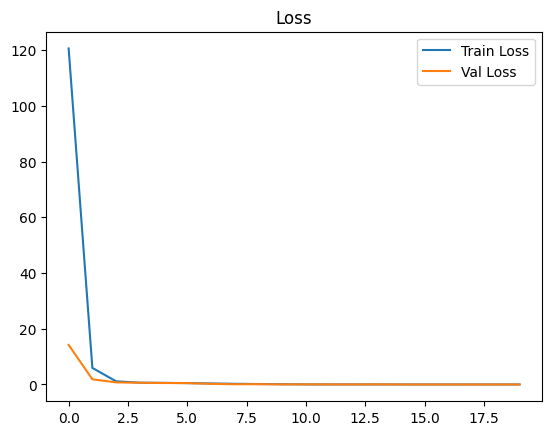

In [66]:
import matplotlib.pyplot as plt

plt.plot(hist.history['accuracy'], label='Train Accuracy')
plt.plot(hist.history['val_accuracy'], label='Val Accuracy')
plt.legend()
plt.title('Accuracy')
plt.show()
plt.plot(hist.history['loss'], label='Train Loss')
plt.plot(hist.history['val_loss'], label='Val Loss')
plt.legend()
plt.title('Loss')
plt.show()
